In [1]:
import sys,os,glob
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from matplotlib.gridspec import GridSpec

from load_TOOCAN_DYAMOND import load_TOOCAN_DYAMOND

%matplotlib inline

In [4]:
DIR_DYAMOND = '/work/bk1040/DYAMOND/data/summer_data/SAM-4km/OUT_2D/'
DIR_DATA = '../data'
DIR_FIG = 'figures'

In [3]:
# # Load toocan data
# list_toocan = load_TOOCAN_DYAMOND(os.path.join(DIR_DATA,'TOOCAN-GLOBAL-20160901-20160910.dat.gz'))

In [5]:
# list_toocan[0].__dict__.keys()

In [2]:
df = pd.read_csv('relation_2_table_UTC_dyamond_segmentation.csv')

In [3]:
df.sort_values(by='UTC',ignore_index=True,inplace=True)

In [8]:
df

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


In [5]:
# i_t = 1000
i_t = 500
root_DYAMOND = df.iloc[i_t]['path_dyamond']
file_PWmean_DYAMOND = 'DYAMOND_9216x4608x74_7.5s_4km_4608_PW.2D.nc'
file_PW_DYAMOND = root_DYAMOND+'.PW.2D.nc'
file_Precac_DYAMOND = root_DYAMOND+'.Precac.2D.nc'
file_U10m_DYAMOND = root_DYAMOND+'.U10m.2D.nc'
file_V10m_DYAMOND = root_DYAMOND+'.V10m.2D.nc'
path_TOOCAN = df.iloc[i_t]['img_seg_path']

In [111]:
# glob.glob(os.path.join(DIR_DYAMOND,'*'))

In [6]:
print(os.path.join(DIR_DYAMOND,file_PW_DYAMOND))

/work/bk1040/DYAMOND/data/summer_data/SAM-4km/OUT_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000120720.PW.2D.nc


In [112]:
# Load DYAMOND data
PW_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND,file_PW_DYAMOND))
PWmean_DYAMOND = xr.open_dataarray(os.path.join(DIR_DATA,file_PWmean_DYAMOND))
Precac_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND,file_Precac_DYAMOND))
U10m_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND,file_U10m_DYAMOND))
V10m_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND,file_V10m_DYAMOND))

In [7]:
os.path.join(os.path.dirname(DIR_DATA),path_TOOCAN)

'../data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/2016_08_11/ImageSegTOOCAN_20160811-23.nc'

In [113]:
# Load TOOCAN data
img_TOOCAN = xr.open_dataarray(os.path.join(os.path.dirname(DIR_DATA),path_TOOCAN))

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [114]:
img_TOOCAN

<xarray.DataArray 'MCS_label' (time: 1, latitude: 2072, longitude: 9216)>
[19095552 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -40.0 -39.96 -39.92 ... 39.92 39.96 40.0
  * longitude  (longitude) float32 0.01953 0.05859 0.09766 ... 359.9 359.9 360.0
  * time       (time) datetime64[ns] 2016-08-11T11:00:00
Attributes:
    units:           
    standard_name:  MCS_label
    long_name:      MCS labellisation

In [21]:
PW_DYAMOND.sel(lon=slice(0,160),lat=slice(-25,25))

<xarray.DataArray 'PW' (time: 1, lat: 1294, lon: 4096)>
[5300224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -24.97 -24.93 -24.9 -24.86 ... 24.86 24.9 24.93 24.97
  * lon      (lon) float32 0.01953 0.05859 0.09766 0.1367 ... 159.9 159.9 160.0
  * time     (time) float32 224.5
Attributes:
    long_name:  Precipitable Water
    units:      kg/m2

In [22]:
slice_lon = slice(0,160)
slice_lat = slice(-25,25)
PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]

<xarray.DataArray 'PW' (lat: 1294, lon: 4096)>
[5300224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -24.97 -24.93 -24.9 -24.86 ... 24.86 24.9 24.93 24.97
  * lon      (lon) float32 0.01953 0.05859 0.09766 0.1367 ... 159.9 159.9 160.0
    time     float32 224.5
Attributes:
    long_name:  Precipitable Water
    units:      kg/m2

In [24]:
# plt.hist(PWmean_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0],bins=50)

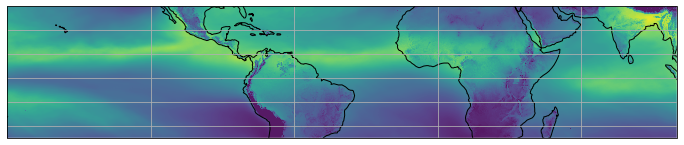

In [25]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

clim = (10,70)
lon_lim = (180,100)
lat_lim = (-25,30)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PWmean_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PWmean_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PWmean_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9)
    im.set_clim(*clim)
    
    # contour at 30mm
    # levels = np.array([25,30])
    mask = Z > 32
    levels = 1
    # ax.contour([lonarray_dyamond,latarray_dyamond],Z,levels=[30],transform=ccrs.PlateCarree(),alpha=0.9)
    # ax.contour(X=lonarray_dyamond,Y=latarray_dyamond,Z=Z,levels=levels)
    # ax.contour(mask,levels=levels)
    
#     # MCSs
    
#     lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
#     lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

#     lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    
#     Z_MCS = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]
    
#     ax.pcolormesh(lonarray_toocan,latarray_toocan,Z_MCS,transform=ccrs.PlateCarree(),cmap=plt.cm.hot,alpha=1)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('110m')
ax.gridlines()

# plt.colorbar()


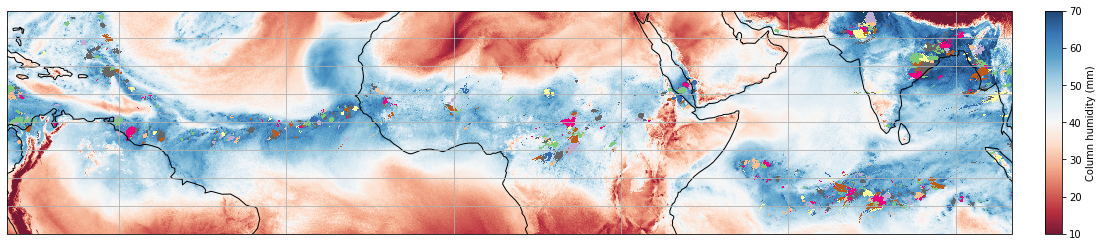

In [98]:
fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
# cmap_mcs = plt.cm.get_cmap('rainbow', 10)
cmap_mcs = plt.cm.get_cmap('Accent', 10)
clim = (10,70)
lon_lim = (280,100)
lat_lim = (-10,30)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PW_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PW_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    
    IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10
    # IMG_roll = np.concatenate((IMG_SEG[0].values, IMG_SEG[0].values), axis=1)
    
    im_MCS = ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('110m')
ax.gridlines()

# colorbar
x,y,w,h = ax.get_position().bounds
dx = w/60
cax = plt.axes([x+w+2*dx,y,dx,h])
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Column humidity (mm)')

# Save
plt.savefig(os.path.join(DIR_FIG,'PW_and_MCSs_lat%d_lon%d_time%d.png'%(*lon_lim,i_t)),dpi=300,bbox_inches='tight')

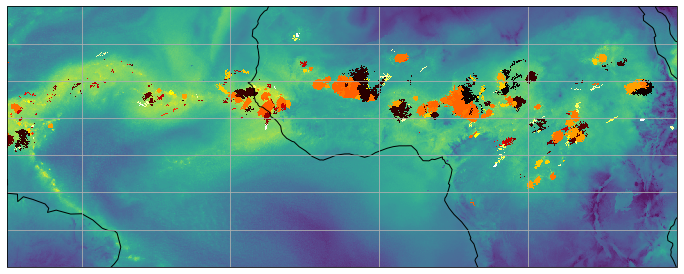

In [88]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
clim = (10,70)
lon_lim = (310,40)
lat_lim = (-10,25)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PW_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PW_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    
    Z_MCS = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]
    
    ax.pcolormesh(lonarray_toocan,latarray_toocan,Z_MCS,transform=ccrs.PlateCarree(),cmap=plt.cm.hot,alpha=1)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('110m')
ax.gridlines()


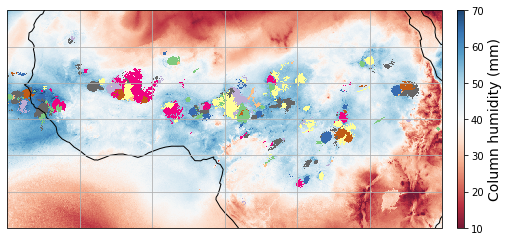

In [109]:
fig = plt.figure(figsize=(12,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
cmap_mcs = plt.cm.get_cmap('Accent', 10)
clim = (10,70)
lon_lim = (340,40)
lat_lim = (-5,25)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PW_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PW_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10
    # Z_MCS = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]
    
    ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)
    
    
#     # surface winds
    
#     n = 60
#     U = U10m_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
#     V = V10m_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    # ax.quiver(x = lonarray_dyamond[::n,::n],y = latarray_dyamond[::n,::n],u = U[::n,::n], v = V[::n,::n],scale = 150)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('110m')
ax.gridlines()

# colorbar
x,y,w,h = ax.get_position().bounds
dx = w/60
cax = plt.axes([x+w+2*dx,y,dx,h])
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Column humidity (mm)',fontsize=14)

# Save
plt.savefig(os.path.join(DIR_FIG,'PW_and_MCSs_lat%d_lon%d_time%d.png'%(*lon_lim,i_t)),dpi=300,bbox_inches='tight')

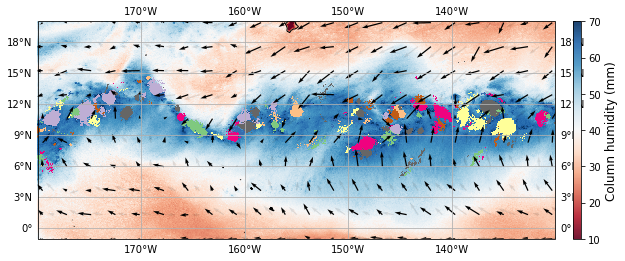

In [115]:
fig = plt.figure(figsize=(12,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
cmap_mcs = plt.cm.get_cmap('Accent', 10)
clim = (10,70)
lon_lim = (130,230)
# lon_lim = (130,0)
lat_lim = (-1,20)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):

    if slice_lon.start == slice_lon.stop:
        continue
        
    lat_dyamond = PW_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PW_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10
    # Z_MCS = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]
    
    ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)
    
    # surface winds
    n = 60
    U = U10m_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    V = V10m_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    ax.quiver(x = lonarray_dyamond[::n,::n],y = latarray_dyamond[::n,::n],u = U[::n,::n], v = V[::n,::n],scale = 250)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1]-360, *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('10m')
ax.gridlines(draw_labels=True)

# colorbar
x,y,w,h = ax.get_position().bounds
dx = w/60
cax = plt.axes([x+w+2*dx,y,dx,h])
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Column humidity (mm)',fontsize=12)

# Save
plt.savefig(os.path.join(DIR_FIG,'PW_and_MCSs_lat%d_lon%d_time%d.png'%(*lon_lim,i_t)),dpi=300,bbox_inches='tight')

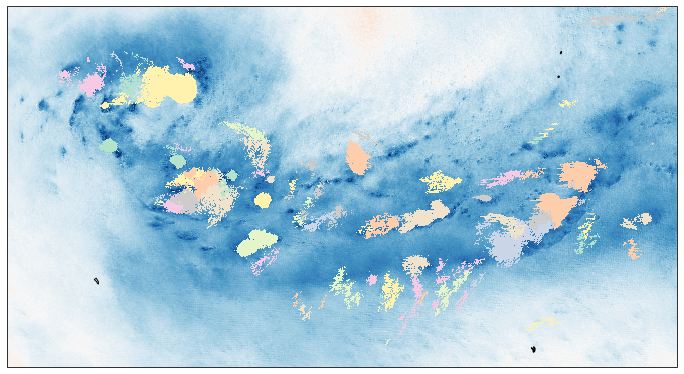

In [81]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
n_cols = 8
cmap_mcs = plt.cm.get_cmap('Pastel2',n_cols)
clim = (10,70)
lon_lim = (52,78)
lat_lim = (-8,6)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PW_DYAMOND.lat.sel(lat=slice_lat)
    lon_dyamond = PW_DYAMOND.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    
    Z_MCS = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%n_cols
    
    ax.pcolormesh(lonarray_toocan,latarray_toocan,Z_MCS,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)

    
ax.set_extent([lon_lim[0],lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('50m')
# ax.gridlines()

# Save
plt.savefig(os.path.join(DIR_FIG,'PW_and_MCSs_lat%d_lon%d_time%d.png'%(*lon_lim,i_t)),dpi=300,bbox_inches='tight')